_________________________________________________________________________________________________________________________________________________________
## <b><h1><center>Advance Financial Modelling: Take Away Paper</center></h1></b>
#### Name: KITTIWORAWAT Thanapon
#### Student Identification: 243664 (22115632)
#### Module Convenor(s): Professor Xiaochun Meng
#### Due Date: Thursday 21th March 2022 09.30UTC (Week 9)
_________________________________________________________________________________________________________________________________________________________

In [1]:
import csv
import numpy as np
import scipy.stats
import scipy as sc
from scipy import stats
from scipy.optimize import minimize
from scipy.stats import t, norm
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc
import pandas as pd
from pandas.plotting import lag_plot, autocorrelation_plot
from pandas import concat, DataFrame, read_csv
import seaborn as sns
import math
from math import sqrt
import statistics
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from arch import arch_model
import random 
from random import gauss, seed
import warnings
warnings.filterwarnings("ignore")

In [2]:
tap = read_csv('Data.csv', header=None)
tap.columns=['Log_return']
tap.head(10)

,Log_return
0,3.21450
1,-0.47781
2,-0.49470
3,1.18890
4,-0.97039
5,0.82615
6,-0.97179
7,-0.20426
8,1.56500
9,-2.44520


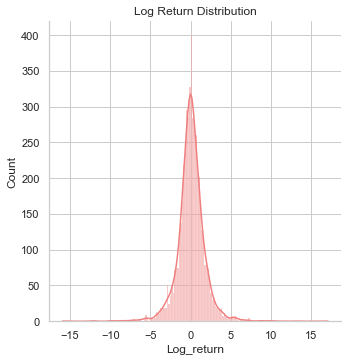

In [3]:
#see log return distribution

sns.set_theme(style="whitegrid")
sns.displot(tap.Log_return, kde=True, color = "lightcoral").set(title = "Log Return Distribution")

You are given a data file with the title ‘Data.xlsx’. The spreadsheet contains a
time series of 5000 daily returns. Split the dataset into an in-sample period of 2000
observations and an out-of-sample period of 2000 observations. You can assume
the conditional means are equal to zero. We will focus on variance modelling in
this question. You can use any software, e.g. Matlab, Python, R, etc.


Using the toolbox/library in the software that you use, choose an appropriate GARCH model to model the variance of the data. You may want to experiment a few different GARCH models then choose the optimal one.

In [3]:
#split into train and test

train_size = int(len(tap) * 0.6)
tap_train, tap_test = tap[0:train_size], tap[train_size:]

tap_train["Log_return"]

0       3.21450
1      -0.47781
2      -0.49470
3       1.18890
4      -0.97039
         ...   
2995    0.18614
2996   -0.77344
2997    0.66711
2998    1.39970
2999    0.83573
Name: Log_return, Length: 3000, dtype: float64

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1849370684.813021
Iteration:      2,   Func. Count:     12,   Neg. LLF: 6888.078957070997
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5763.426143515764
Iteration:      4,   Func. Count:     24,   Neg. LLF: 5832.937585607628
Iteration:      5,   Func. Count:     29,   Neg. LLF: 5681.246602881578
Iteration:      6,   Func. Count:     34,   Neg. LLF: 5680.863992103231
Iteration:      7,   Func. Count:     38,   Neg. LLF: 5680.863729821949
Iteration:      8,   Func. Count:     42,   Neg. LLF: 5680.863722496062
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5680.863721996551
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5680.863721996551
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


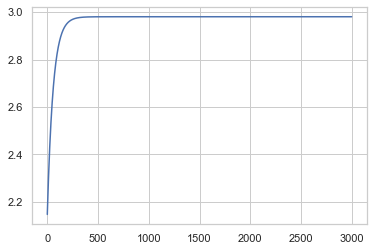

In [6]:
#GARCH fit model


model = arch_model(tap_train, mean = "Zero", vol = 'GARCH', p = 1, q = 1)

#seed pseudorandom number generator
seed(1)

#define model
garch = arch_model(tap_train, mean = "Zero", vol = 'GARCH', p = 1, q = 1)

#fit model
garch_fit = garch.fit()
#forecast the test set
yhat = garch_fit.forecast(horizon = len(tap_train))
#plot the actual variance
var = [i*0.01 for i in range(0,5000)]
#plt.plot(var[-tap_test:])
#plot forecast variance
plt.plot(yhat.variance.values[-1, :])
plt.show()

In [126]:
model11ARCH = arch_model(
    tap_train, mean = "Zero", vol = 'ARCH', p = 1
)
x = model11ARCH.fit()
x.summary()

Iteration:      1,   Func. Count:      4,   Neg. LLF: 7519.717885666027
Iteration:      2,   Func. Count:     10,   Neg. LLF: 5972.377654271424
Iteration:      3,   Func. Count:     15,   Neg. LLF: 5877.887423443439
Iteration:      4,   Func. Count:     18,   Neg. LLF: 5877.887420797438
Iteration:      5,   Func. Count:     20,   Neg. LLF: 5877.887420797435
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5877.887420797438
            Iterations: 5
            Function evaluations: 20
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -5877.89
Distribution:                  Normal   AIC:                           11759.8
Method:            Maximum Likelihood   BIC:                           11771.8
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:58:07   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.2142      0.159     13.946  3.344e-44 [  1.903,  2.525]
alpha[1]       0.3688  6.680e-02      5.520  3.383e-08 [  0.238,  0.500]
========================================================================

Covariance estimator: robust
"""

In [127]:
model11EGARCH = arch_model(
    tap_train, mean = "Zero", vol = 'EGARCH', p = 1, q = 1
)
x = model11EGARCH.fit()
x.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1075267585.4503417
Iteration:      2,   Func. Count:     13,   Neg. LLF: 24664.383238188177
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5706.698562821916
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1833562863.7658403
Iteration:      5,   Func. Count:     33,   Neg. LLF: 5714.477691215863
Iteration:      6,   Func. Count:     38,   Neg. LLF: 5667.9140346785325
Iteration:      7,   Func. Count:     42,   Neg. LLF: 5667.776635296251
Iteration:      8,   Func. Count:     46,   Neg. LLF: 5667.766097826307
Iteration:      9,   Func. Count:     50,   Neg. LLF: 5667.765581881078
Iteration:     10,   Func. Count:     54,   Neg. LLF: 5667.764982115592
Iteration:     11,   Func. Count:     58,   Neg. LLF: 5667.764974566573
Iteration:     12,   Func. Count:     62,   Neg. LLF: 5667.764972260056
Iteration:     13,   Func. Count:     65,   Neg. LLF: 5667.764972260203
Optimization terminated successfully    (Exit mode 0)
      

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - EGARCH Model Results                       
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -5667.76
Distribution:                  Normal   AIC:                           11341.5
Method:            Maximum Likelihood   BIC:                           11359.5
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:58:08   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0205  7.990e-03      2.560  1.046e-02 [4.797e-03,3.612e-02]
alpha[1]       0.0945  2.698e-02      3.504  4.579e-04   [4.166e-02,  0.147]
beta[1]        0.9866  5.965e-03    165.406      0.000     [  0.975,  0.998]
============================================================================

Covariance estimator: robust
"""

In [128]:
model11EGARCHT = arch_model(
    tap_train, mean = "Zero", vol = 'EGARCH', p = 1, q = 1, dist = 'studentsT'
)
x = model11EGARCHT.fit()
x.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 60862.98513573438
Iteration:      2,   Func. Count:     17,   Neg. LLF: 14336.235126204625
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5427.807532409381
Iteration:      4,   Func. Count:     33,   Neg. LLF: 46325.78600589163
Iteration:      5,   Func. Count:     40,   Neg. LLF: 152798.1736596502
Iteration:      6,   Func. Count:     46,   Neg. LLF: 5423.72552545761
Iteration:      7,   Func. Count:     52,   Neg. LLF: 5513.555499779108
Iteration:      8,   Func. Count:     58,   Neg. LLF: 5419.579245404692
Iteration:      9,   Func. Count:     63,   Neg. LLF: 5419.540684982845
Iteration:     10,   Func. Count:     68,   Neg. LLF: 5419.5397954914815
Iteration:     11,   Func. Count:     73,   Neg. LLF: 5419.5394190512125
Iteration:     12,   Func. Count:     78,   Neg. LLF: 5419.53934979888
Iteration:     13,   Func. Count:     83,   Neg. LLF: 5419.53934403146
Iteration:     14,   Func. Count:     87,   Neg. LLF: 5419.53934

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - EGARCH Model Results                          
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -5419.54
Distribution:      Standardized Student's t   AIC:                           10847.1
Method:                  Maximum Likelihood   BIC:                           10871.1
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:58:09   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0134  4.735e-03      2.825  4.722e-03 [4.098e-03,2.266e-02]
alpha[1]       0.1227  2.105e-02      5.828  5.603e-09   [8.145e-02,  0.164]
beta[1]        0.9942  2.967e-03    335.099      0.000     [  0.988,  1.000]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.5941      0.415     11.083  1.513e-28 [  3.782,  5.406]
========================================================================

Covariance estimator: robust
"""

In [129]:
model33EGARCHT = arch_model(
    tap_train, mean = "Zero", vol = 'EGARCH', p = 3, q = 3, dist = 'studentsT'
)
x = model33EGARCHT.fit()
x.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 36669.55670224789
Iteration:      2,   Func. Count:     28,   Neg. LLF: 110625.81356696895
Iteration:      3,   Func. Count:     41,   Neg. LLF: 179727.26265720138
Iteration:      4,   Func. Count:     54,   Neg. LLF: 44217.473151694765
Iteration:      5,   Func. Count:     65,   Neg. LLF: 5771.760939170836
Iteration:      6,   Func. Count:     75,   Neg. LLF: 5536.2324075124
Iteration:      7,   Func. Count:     85,   Neg. LLF: 5452.813579253791
Iteration:      8,   Func. Count:     95,   Neg. LLF: 9902.359063227945
Iteration:      9,   Func. Count:    105,   Neg. LLF: 5419.378391795765
Iteration:     10,   Func. Count:    114,   Neg. LLF: 5420.400852418673
Iteration:     11,   Func. Count:    124,   Neg. LLF: 5425.905943592505
Iteration:     12,   Func. Count:    134,   Neg. LLF: 5450.054050881879
Iteration:     13,   Func. Count:    144,   Neg. LLF: 5443.028722708923
Iteration:     14,   Func. Count:    154,   Neg. LLF: 5640.5710

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - EGARCH Model Results                          
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -5417.34
Distribution:      Standardized Student's t   AIC:                           10850.7
Method:                  Maximum Likelihood   BIC:                           10898.7
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:58:09   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0360  1.219e-02      2.956  3.114e-03  [1.214e-02,5.991e-02]
alpha[1]       0.1322  2.107e-02      6.273  3.542e-10    [9.089e-02,  0.174]
alpha[2]       0.1168  2.175e-02      5.373  7.727e-08    [7.423e-02,  0.159]
alpha[3]       0.1066  2.119e-02      5.032  4.866e-07    [6.508e-02,  0.148]
beta[1]        0.0000  8.749e-03      0.000      1.000 [-1.715e-02,1.715e-02]
beta[2]        0.0000  7.830e-03      0.000      1.000 [-1.535e-02,1.535e-02]
beta[3]        0.9860  1.406e-02     70.125      0.000      [  0.958,  1.014]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.6156      0.426     10.843  2.161e-27 [  3.781,  5.450]
========================================================================

Covariance estimator: robust
"""

In [130]:
model11GED = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 1, q = 1, dist = 'GED'
)
x = model11GED.fit()
x.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2680171.5501666265
Iteration:      2,   Func. Count:     13,   Neg. LLF: 6293.840058940701
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5499.0487339411675
Iteration:      4,   Func. Count:     26,   Neg. LLF: 8909.112514361317
Iteration:      5,   Func. Count:     32,   Neg. LLF: 710627704705579.9
Iteration:      6,   Func. Count:     39,   Neg. LLF: 6183.092222976522
Iteration:      7,   Func. Count:     47,   Neg. LLF: 5496.301099186563
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5471.616993820289
Iteration:      9,   Func. Count:     58,   Neg. LLF: 5471.3182969054915
Iteration:     10,   Func. Count:     63,   Neg. LLF: 5471.129598150563
Iteration:     11,   Func. Count:     68,   Neg. LLF: 5471.107619091368
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5471.10626740995
Iteration:     13,   Func. Count:     78,   Neg. LLF: 5471.106252581522
Iteration:     14,   Func. Count:     82,   Neg. LLF: 5471.106

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Zero Mean - GARCH Model Results                              
==========================================================================================
Dep. Variable:                         Log_return   R-squared:                       0.000
Mean Model:                             Zero Mean   Adj. R-squared:                  0.000
Vol Model:                                  GARCH   Log-Likelihood:               -5471.11
Distribution:      Generalized Error Distribution   AIC:                           10950.2
Method:                        Maximum Likelihood   BIC:                           10974.2
                                                    No. Observations:                 3000
Date:                            Tue, Mar 22 2022   Df Residuals:                     3000
Time:                                    01:58:10   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0300  1.467e-02      2.048  4.061e-02 [1.284e-03,5.877e-02]
alpha[1]       0.0541  1.803e-02      3.000  2.700e-03 [1.875e-02,8.944e-02]
beta[1]        0.9360  2.061e-02     45.426      0.000     [  0.896,  0.976]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.1363  5.793e-02     19.615  1.150e-85 [  1.023,  1.250]
========================================================================

Covariance estimator: robust
"""

In [131]:
#GARCH process return

model11 = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 1, q = 1
)
x = model11.fit()
x.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1849370684.813021
Iteration:      2,   Func. Count:     12,   Neg. LLF: 6888.078957070997
Iteration:      3,   Func. Count:     19,   Neg. LLF: 5763.426143515764
Iteration:      4,   Func. Count:     24,   Neg. LLF: 5832.937585607628
Iteration:      5,   Func. Count:     29,   Neg. LLF: 5681.246602881578
Iteration:      6,   Func. Count:     34,   Neg. LLF: 5680.863992103231
Iteration:      7,   Func. Count:     38,   Neg. LLF: 5680.863729821949
Iteration:      8,   Func. Count:     42,   Neg. LLF: 5680.863722496062
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5680.863721996551
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5680.863721996551
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5680.86
Distribution:                  Normal   AIC:                           11367.7
Method:            Maximum Likelihood   BIC:                           11385.7
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:58:10   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0513  3.515e-02      1.458      0.145 [-1.763e-02,  0.120]
alpha[1]       0.0481  2.707e-02      1.777  7.561e-02 [-4.959e-03,  0.101]
beta[1]        0.9347  3.477e-02     26.886 3.241e-159    [  0.867,  1.003]
===========================================================================

Covariance estimator: robust
"""

In [10]:
#GARCH process return

model11T = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 1, q = 1, dist = 'studentsT'
)
xx = model11T.fit()
xx.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 47538.73435984528
Iteration:      2,   Func. Count:     13,   Neg. LLF: 20612.89746574973
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7936.1466784158365
Iteration:      4,   Func. Count:     26,   Neg. LLF: 7280.756208617888
Iteration:      5,   Func. Count:     32,   Neg. LLF: 5445.731011459899
Iteration:      6,   Func. Count:     38,   Neg. LLF: 7021.974276275067
Iteration:      7,   Func. Count:     44,   Neg. LLF: 5437.710379194003
Iteration:      8,   Func. Count:     50,   Neg. LLF: 5436.703569095075
Iteration:      9,   Func. Count:     56,   Neg. LLF: 5436.169569926327
Iteration:     10,   Func. Count:     61,   Neg. LLF: 5436.168968985603
Iteration:     11,   Func. Count:     67,   Neg. LLF: 5436.166386934618
Iteration:     12,   Func. Count:     72,   Neg. LLF: 5436.166383227914
Iteration:     13,   Func. Count:     77,   Neg. LLF: 5436.1663818869865
Iteration:     14,   Func. Count:     81,   Neg. LLF: 5436.166

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5436.17
Distribution:      Standardized Student's t   AIC:                           10880.3
Method:                  Maximum Likelihood   BIC:                           10904.4
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              00:16:06   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0213  1.077e-02      1.975  4.821e-02 [1.672e-04,4.239e-02]
alpha[1]       0.0558  1.704e-02      3.273  1.064e-03 [2.238e-02,8.918e-02]
beta[1]        0.9393  1.800e-02     52.174      0.000     [  0.904,  0.975]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4784      0.392     11.412  3.629e-30 [  3.709,  5.248]
========================================================================

Covariance estimator: robust
"""

In [11]:
print("Alpha = ", xx.params["alpha[1]"])
print("Beta = ", xx.params["beta[1]"])
print("Omega = ", xx.params["omega"])

Alpha =  0.05577876778912161
Beta =  0.9393023400020715
Omega =  0.02128109460844881


In [113]:
model12 = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 1, q = 2
)
x = model12.fit()
x.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1833379556.4278765
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6981.26612626283
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5767.159770692203
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5684.191784739243
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5683.732453692993
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5680.209190832809
Iteration:      7,   Func. Count:     45,   Neg. LLF: 5680.192148466955
Iteration:      8,   Func. Count:     50,   Neg. LLF: 5680.191515977216
Iteration:      9,   Func. Count:     55,   Neg. LLF: 5680.191495606151
Iteration:     10,   Func. Count:     59,   Neg. LLF: 5680.191495606037
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5680.191495606151
            Iterations: 10
            Function evaluations: 59
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5680.19
Distribution:                  Normal   AIC:                           11368.4
Method:            Maximum Likelihood   BIC:                           11392.4
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:57:43   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0606  3.763e-02      1.611      0.107 [-1.315e-02,  0.134]
alpha[1]       0.0571  2.634e-02      2.167  3.026e-02  [5.446e-03,  0.109]
beta[1]        0.6754      0.169      3.994  6.495e-05    [  0.344,  1.007]
beta[2]        0.2470      0.178      1.387      0.165    [ -0.102,  0.596]
===========================================================================

Covariance estimator: robust
"""

In [114]:
model12T = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 1, q = 2, dist = 'studentsT'
)
x = model12T.fit()
x.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 47538.7343639395
Iteration:      2,   Func. Count:     15,   Neg. LLF: 18946.373648297733
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8032.55059500808
Iteration:      4,   Func. Count:     30,   Neg. LLF: 5444.311974744119
Iteration:      5,   Func. Count:     37,   Neg. LLF: 7187.693999639734
Iteration:      6,   Func. Count:     44,   Neg. LLF: 5445.030005719688
Iteration:      7,   Func. Count:     51,   Neg. LLF: 5437.358000317186
Iteration:      8,   Func. Count:     58,   Neg. LLF: 5435.553548680809
Iteration:      9,   Func. Count:     64,   Neg. LLF: 5438.496504073167
Iteration:     10,   Func. Count:     71,   Neg. LLF: 5435.502248807214
Iteration:     11,   Func. Count:     77,   Neg. LLF: 5435.486473118428
Iteration:     12,   Func. Count:     83,   Neg. LLF: 5435.484371448774
Iteration:     13,   Func. Count:     89,   Neg. LLF: 5435.48379627041
Iteration:     14,   Func. Count:     95,   Neg. LLF: 5435.4834341

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5435.48
Distribution:      Standardized Student's t   AIC:                           10881.0
Method:                  Maximum Likelihood   BIC:                           10911.0
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:57:44   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0273  1.256e-02      2.174  2.974e-02 [2.683e-03,5.191e-02]
alpha[1]       0.0728  1.809e-02      4.023  5.735e-05   [3.732e-02,  0.108]
beta[1]        0.5381      0.231      2.329  1.987e-02   [8.521e-02,  0.991]
beta[2]        0.3826      0.229      1.673  9.438e-02  [-6.570e-02,  0.831]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4800      0.393     11.410  3.737e-30 [  3.710,  5.250]
========================================================================

Covariance estimator: robust
"""

In [115]:
model21 = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 2, q = 1
)
x = model21.fit()
x.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1849370684.813021
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6972.668397694069
Iteration:      3,   Func. Count:     21,   Neg. LLF: 5756.204118310835
Iteration:      4,   Func. Count:     27,   Neg. LLF: 6300.498339343527
Iteration:      5,   Func. Count:     33,   Neg. LLF: 5681.8551945825775
Iteration:      6,   Func. Count:     38,   Neg. LLF: 5681.141753345938
Iteration:      7,   Func. Count:     43,   Neg. LLF: 5680.949888309642
Iteration:      8,   Func. Count:     48,   Neg. LLF: 5680.867655677113
Iteration:      9,   Func. Count:     53,   Neg. LLF: 5680.8648767475515
Iteration:     10,   Func. Count:     58,   Neg. LLF: 5680.863724294941
Iteration:     11,   Func. Count:     63,   Neg. LLF: 5680.863722256878
Iteration:     12,   Func. Count:     67,   Neg. LLF: 5680.863722256676
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5680.863722256878
            Iterations: 12

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5680.86
Distribution:                  Normal   AIC:                           11369.7
Method:            Maximum Likelihood   BIC:                           11393.8
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:57:44   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0513  6.714e-02      0.763      0.445 [-8.033e-02,  0.183]
alpha[1]       0.0481  3.515e-02      1.368      0.171 [-2.080e-02,  0.117]
alpha[2]   5.3308e-10  8.651e-02  6.162e-09      1.000    [ -0.170,  0.170]
beta[1]        0.9347  7.698e-02     12.142  6.289e-34    [  0.784,  1.086]
===========================================================================

Covariance estimator: robust
"""

In [116]:
model21T = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 2, q = 1, dist = 'studentsT'
)
x = model21T.fit()
x.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 47538.7343639395
Iteration:      2,   Func. Count:     15,   Neg. LLF: 20042.95983364765
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7936.614496161309
Iteration:      4,   Func. Count:     30,   Neg. LLF: 8348.370624476172
Iteration:      5,   Func. Count:     37,   Neg. LLF: 5441.662920279697
Iteration:      6,   Func. Count:     43,   Neg. LLF: 7886.01091459811
Iteration:      7,   Func. Count:     50,   Neg. LLF: 5632.8964251798225
Iteration:      8,   Func. Count:     59,   Neg. LLF: 5436.794022734876
Iteration:      9,   Func. Count:     65,   Neg. LLF: 5437.008326562176
Iteration:     10,   Func. Count:     72,   Neg. LLF: 5436.230615892636
Iteration:     11,   Func. Count:     78,   Neg. LLF: 5436.173786907771
Iteration:     12,   Func. Count:     84,   Neg. LLF: 5436.16695965072
Iteration:     13,   Func. Count:     90,   Neg. LLF: 5436.166392323549
Iteration:     14,   Func. Count:     96,   Neg. LLF: 5436.1663822

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5436.17
Distribution:      Standardized Student's t   AIC:                           10882.3
Method:                  Maximum Likelihood   BIC:                           10912.4
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:57:45   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0213  1.391e-02      1.530      0.126 [-5.974e-03,4.854e-02]
alpha[1]       0.0558  2.252e-02      2.477  1.326e-02  [1.164e-02,9.991e-02]
alpha[2]   4.7122e-11  3.667e-02  1.285e-09      1.000 [-7.187e-02,7.187e-02]
beta[1]        0.9393  2.579e-02     36.419 2.110e-290      [  0.889,  0.990]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4786      0.403     11.114  1.076e-28 [  3.689,  5.268]
========================================================================

Covariance estimator: robust
"""

In [117]:
model22 = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 2, q = 2
)
x = model22.fit()
x.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1849370684.813021
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7080.88572599886
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5986.261764107134
Iteration:      4,   Func. Count:     33,   Neg. LLF: 5716.335819769158
Iteration:      5,   Func. Count:     40,   Neg. LLF: 6569.778234897165
Iteration:      6,   Func. Count:     47,   Neg. LLF: 5680.741886654923
Iteration:      7,   Func. Count:     53,   Neg. LLF: 5680.2838331846015
Iteration:      8,   Func. Count:     59,   Neg. LLF: 5680.20198837394
Iteration:      9,   Func. Count:     65,   Neg. LLF: 5680.19204566001
Iteration:     10,   Func. Count:     71,   Neg. LLF: 5680.19156951649
Iteration:     11,   Func. Count:     77,   Neg. LLF: 5680.191495490248
Iteration:     12,   Func. Count:     82,   Neg. LLF: 5680.191495489053
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5680.191495490248
            Iterations: 12
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5680.19
Distribution:                  Normal   AIC:                           11370.4
Method:            Maximum Likelihood   BIC:                           11400.4
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:57:46   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0606  4.197e-02      1.444      0.149   [-2.165e-02,  0.143]
alpha[1]       0.0571  3.695e-02      1.545      0.122   [-1.534e-02,  0.129]
alpha[2]       0.0000  4.793e-02      0.000      1.000 [-9.395e-02,9.395e-02]
beta[1]        0.6754      0.630      1.072      0.284      [ -0.559,  1.910]
beta[2]        0.2470      0.602      0.411      0.681      [ -0.932,  1.426]
=============================================================================

Covariance estimator: robust
"""

In [118]:
model22T = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 2, q = 2, dist = 'studentsT'
)
x = model22T.fit()
x.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 47538.734345965444
Iteration:      2,   Func. Count:     17,   Neg. LLF: 18221.566578855512
Iteration:      3,   Func. Count:     26,   Neg. LLF: 8125.06250699002
Iteration:      4,   Func. Count:     34,   Neg. LLF: 5462.9486532515575
Iteration:      5,   Func. Count:     42,   Neg. LLF: 7339.9805590710375
Iteration:      6,   Func. Count:     50,   Neg. LLF: 5504.57062909629
Iteration:      7,   Func. Count:     58,   Neg. LLF: 5478.969766463356
Iteration:      8,   Func. Count:     66,   Neg. LLF: 5509.486026868734
Iteration:      9,   Func. Count:     74,   Neg. LLF: 5436.630593681519
Iteration:     10,   Func. Count:     82,   Neg. LLF: 5435.683142980928
Iteration:     11,   Func. Count:     89,   Neg. LLF: 5435.548286337094
Iteration:     12,   Func. Count:     96,   Neg. LLF: 5435.639602139131
Iteration:     13,   Func. Count:    104,   Neg. LLF: 5435.50352733669
Iteration:     14,   Func. Count:    111,   Neg. LLF: 5435.4843

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5435.48
Distribution:      Standardized Student's t   AIC:                           10883.0
Method:                  Maximum Likelihood   BIC:                           10919.0
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:57:46   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0273  4.051e-02      0.674      0.500 [-5.210e-02,  0.107]
alpha[1]       0.0728  4.963e-02      1.466      0.143 [-2.451e-02,  0.170]
alpha[2]   6.6552e-16      0.138  4.812e-15      1.000    [ -0.271,  0.271]
beta[1]        0.5381      1.173      0.459      0.647    [ -1.762,  2.838]
beta[2]        0.3826      1.075      0.356      0.722    [ -1.724,  2.489]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4800      0.409     10.960  5.932e-28 [  3.679,  5.281]
========================================================================

Covariance estimator: robust
"""

In [119]:
model31 = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 3, q = 1
)
x = model31.fit()
x.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1849370684.813021
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7071.897320788844
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5986.423967623983
Iteration:      4,   Func. Count:     33,   Neg. LLF: 5681.9085581772
Iteration:      5,   Func. Count:     39,   Neg. LLF: 5681.33678156881
Iteration:      6,   Func. Count:     45,   Neg. LLF: 5680.919323578811
Iteration:      7,   Func. Count:     51,   Neg. LLF: 5680.886340135369
Iteration:      8,   Func. Count:     57,   Neg. LLF: 5680.86441115171
Iteration:      9,   Func. Count:     63,   Neg. LLF: 5680.8637576119345
Iteration:     10,   Func. Count:     69,   Neg. LLF: 5680.863724484536
Iteration:     11,   Func. Count:     75,   Neg. LLF: 5680.86372200583
Iteration:     12,   Func. Count:     80,   Neg. LLF: 5680.863722007141
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5680.86372200583
            Iterations: 12
      

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5680.86
Distribution:                  Normal   AIC:                           11371.7
Method:            Maximum Likelihood   BIC:                           11401.8
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:57:47   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0513  8.814e-02      0.582      0.561    [ -0.121,  0.224]
alpha[1]       0.0481  3.603e-02      1.335      0.182 [-2.251e-02,  0.119]
alpha[2]       0.0000  7.055e-02      0.000      1.000    [ -0.138,  0.138]
alpha[3]       0.0000  5.994e-02      0.000      1.000    [ -0.117,  0.117]
beta[1]        0.9347      0.101      9.222  2.928e-20    [  0.736,  1.133]
===========================================================================

Covariance estimator: robust
"""

In [120]:
model31T = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 3, q = 1, dist = 'studentsT'
)
x = model31T.fit()
x.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 47538.73434512448
Iteration:      2,   Func. Count:     17,   Neg. LLF: 19521.734134481543
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7936.773943898058
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7981.072830973022
Iteration:      5,   Func. Count:     42,   Neg. LLF: 5438.436175989142
Iteration:      6,   Func. Count:     49,   Neg. LLF: 8319.530671394734
Iteration:      7,   Func. Count:     57,   Neg. LLF: 5576.8949376604505
Iteration:      8,   Func. Count:     67,   Neg. LLF: 5436.274503389985
Iteration:      9,   Func. Count:     74,   Neg. LLF: 5436.1833540002945
Iteration:     10,   Func. Count:     81,   Neg. LLF: 5436.1680985628955
Iteration:     11,   Func. Count:     88,   Neg. LLF: 5436.1666488717265
Iteration:     12,   Func. Count:     95,   Neg. LLF: 5436.166383683559
Iteration:     13,   Func. Count:    102,   Neg. LLF: 5436.166381985934
Iteration:     14,   Func. Count:    108,   Neg. LLF: 5436.

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5436.17
Distribution:      Standardized Student's t   AIC:                           10884.3
Method:                  Maximum Likelihood   BIC:                           10920.4
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:57:47   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0213  1.537e-02      1.384      0.166 [-8.852e-03,5.141e-02]
alpha[1]       0.0558  2.255e-02      2.473  1.340e-02  [1.157e-02,9.998e-02]
alpha[2]       0.0000  4.318e-02      0.000      1.000 [-8.463e-02,8.463e-02]
alpha[3]       0.0000  3.890e-02      0.000      1.000 [-7.624e-02,7.624e-02]
beta[1]        0.9393  2.867e-02     32.765 1.871e-235      [  0.883,  0.995]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4785      0.413     10.832  2.416e-27 [  3.668,  5.289]
========================================================================

Covariance estimator: robust
"""

In [121]:
model32 = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 3, q = 2
)
x = model32.fit()
x.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1849370684.813021
Iteration:      2,   Func. Count:     18,   Neg. LLF: 7158.860219047341
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5978.905584132393
Iteration:      4,   Func. Count:     37,   Neg. LLF: 5694.981131178505
Iteration:      5,   Func. Count:     45,   Neg. LLF: 6370.1910002508885
Iteration:      6,   Func. Count:     53,   Neg. LLF: 5680.612051155008
Iteration:      7,   Func. Count:     60,   Neg. LLF: 5680.277536280224
Iteration:      8,   Func. Count:     67,   Neg. LLF: 5680.205071696417
Iteration:      9,   Func. Count:     74,   Neg. LLF: 5680.199473519671
Iteration:     10,   Func. Count:     81,   Neg. LLF: 5680.191505653394
Iteration:     11,   Func. Count:     88,   Neg. LLF: 5680.191495577796
Iteration:     12,   Func. Count:     94,   Neg. LLF: 5680.191495580728
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5680.191495577796
            Iterations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5680.19
Distribution:                  Normal   AIC:                           11372.4
Method:            Maximum Likelihood   BIC:                           11408.4
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:57:48   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0606  6.947e-02      0.872      0.383   [-7.556e-02,  0.197]
alpha[1]       0.0571  2.440e-02      2.339  1.934e-02    [9.247e-03,  0.105]
alpha[2]   8.1894e-12  2.274e-02  3.601e-10      1.000 [-4.457e-02,4.457e-02]
alpha[3]       0.0000  6.611e-02      0.000      1.000      [ -0.130,  0.130]
beta[1]        0.6753      0.397      1.703  8.864e-02      [ -0.102,  1.453]
beta[2]        0.2471      0.407      0.607      0.544      [ -0.551,  1.045]
=============================================================================

Covariance estimator: robust
"""

In [122]:
model32T = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 3, q = 2, dist = 'studentsT'
)
x = model32T.fit()
x.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 47538.73434950317
Iteration:      2,   Func. Count:     19,   Neg. LLF: 17851.919809674404
Iteration:      3,   Func. Count:     29,   Neg. LLF: 8124.393982705476
Iteration:      4,   Func. Count:     38,   Neg. LLF: 5457.735994210621
Iteration:      5,   Func. Count:     47,   Neg. LLF: 7354.070556801883
Iteration:      6,   Func. Count:     57,   Neg. LLF: 5441.937157582165
Iteration:      7,   Func. Count:     66,   Neg. LLF: 5478.166400445426
Iteration:      8,   Func. Count:     75,   Neg. LLF: 5440.317710170854
Iteration:      9,   Func. Count:     84,   Neg. LLF: 5436.342724831777
Iteration:     10,   Func. Count:     93,   Neg. LLF: 5435.5896622315895
Iteration:     11,   Func. Count:    101,   Neg. LLF: 5435.544825937384
Iteration:     12,   Func. Count:    109,   Neg. LLF: 5435.506482010775
Iteration:     13,   Func. Count:    117,   Neg. LLF: 5435.484551283088
Iteration:     14,   Func. Count:    125,   Neg. LLF: 5435.483

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5435.48
Distribution:      Standardized Student's t   AIC:                           10885.0
Method:                  Maximum Likelihood   BIC:                           10927.0
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:57:48   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0273      0.169      0.162      0.871 [ -0.303,  0.358]
alpha[1]       0.0728      0.123      0.590      0.556 [ -0.169,  0.315]
alpha[2]       0.0000      0.857      0.000      1.000 [ -1.679,  1.679]
alpha[3]   7.9273e-12      0.289  2.743e-11      1.000 [ -0.566,  0.566]
beta[1]        0.5381      8.190  6.571e-02      0.948 [-15.513, 16.590]
beta[2]        0.3826      7.703  4.967e-02      0.960 [-14.715, 15.480]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4800      0.413     10.860  1.779e-27 [  3.672,  5.289]
========================================================================

Covariance estimator: robust
"""

In [123]:
model33 = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 3, q = 3
)
x = model33.fit()
x.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 16883.093245712113
Iteration:      2,   Func. Count:     22,   Neg. LLF: 6517.460028459663
Iteration:      3,   Func. Count:     33,   Neg. LLF: 6529.050874517119
Iteration:      4,   Func. Count:     43,   Neg. LLF: 5708.239026018737
Iteration:      5,   Func. Count:     52,   Neg. LLF: 5680.37817082279
Iteration:      6,   Func. Count:     60,   Neg. LLF: 6144.946588513596
Iteration:      7,   Func. Count:     69,   Neg. LLF: 5798.853563369141
Iteration:      8,   Func. Count:     79,   Neg. LLF: 5691.779635483161
Iteration:      9,   Func. Count:     88,   Neg. LLF: 5675.553456496529
Iteration:     10,   Func. Count:     97,   Neg. LLF: 5682.753993832363
Iteration:     11,   Func. Count:    106,   Neg. LLF: 5675.082216608213
Iteration:     12,   Func. Count:    114,   Neg. LLF: 5675.081266187575
Iteration:     13,   Func. Count:    122,   Neg. LLF: 5675.0809191539265
Iteration:     14,   Func. Count:    130,   Neg. LLF: 5675.0808

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:             Log_return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5675.08
Distribution:                  Normal   AIC:                           11364.2
Method:            Maximum Likelihood   BIC:                           11406.2
                                        No. Observations:                 3000
Date:                Tue, Mar 22 2022   Df Residuals:                     3000
Time:                        01:57:49   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1283  8.136e-02      1.576      0.115   [-3.121e-02,  0.288]
alpha[1]       0.0615  3.515e-02      1.751  7.999e-02   [-7.353e-03,  0.130]
alpha[2]       0.0564  5.422e-02      1.040      0.299   [-4.990e-02,  0.163]
alpha[3]   9.9744e-03  1.304e-02      0.765      0.444 [-1.558e-02,3.552e-02]
beta[1]        0.0282      0.100      0.281      0.779      [ -0.169,  0.225]
beta[2]    3.8956e-11      0.157  2.478e-10      1.000      [ -0.308,  0.308]
beta[3]        0.8016  9.526e-02      8.416  3.912e-17      [  0.615,  0.988]
=============================================================================

Covariance estimator: robust
"""

In [124]:
model33T = arch_model(
    tap_train, mean = "Zero", vol = 'GARCH', p = 3, q = 3, dist = 'studentsT'
)
x = model33T.fit()
x.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9807.030407155862
Iteration:      2,   Func. Count:     21,   Neg. LLF: 5939.574602120208
Iteration:      3,   Func. Count:     33,   Neg. LLF: 5486.816993390231
Iteration:      4,   Func. Count:     43,   Neg. LLF: 5601.9088897357
Iteration:      5,   Func. Count:     53,   Neg. LLF: 5501.4892599472505
Iteration:      6,   Func. Count:     63,   Neg. LLF: 5437.2603273845025
Iteration:      7,   Func. Count:     73,   Neg. LLF: 5438.287726497439
Iteration:      8,   Func. Count:     83,   Neg. LLF: 5452.816133059992
Iteration:      9,   Func. Count:     94,   Neg. LLF: 5439.138377875355
Iteration:     10,   Func. Count:    104,   Neg. LLF: 5435.230125012446
Iteration:     11,   Func. Count:    113,   Neg. LLF: 5435.13533163148
Iteration:     12,   Func. Count:    122,   Neg. LLF: 5510.208774103913
Iteration:     13,   Func. Count:    133,   Neg. LLF: 5435.084354004839
Iteration:     14,   Func. Count:    142,   Neg. LLF: 5435.071417

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5435.07
Distribution:      Standardized Student's t   AIC:                           10886.1
Method:                  Maximum Likelihood   BIC:                           10934.2
                                              No. Observations:                 3000
Date:                      Tue, Mar 22 2022   Df Residuals:                     3000
Time:                              01:57:52   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0431  2.862e-02      1.507      0.132 [-1.297e-02,9.924e-02]
alpha[1]       0.0834  2.746e-02      3.037  2.388e-03    [2.958e-02,  0.137]
alpha[2]       0.0343  5.129e-02      0.670      0.503   [-6.619e-02,  0.135]
alpha[3]       0.0000  5.358e-02      0.000      1.000      [ -0.105,  0.105]
beta[1]        0.0000      0.446      0.000      1.000      [ -0.873,  0.873]
beta[2]        0.4815      0.407      1.183      0.237      [ -0.316,  1.279]
beta[3]        0.3905      0.308      1.267      0.205      [ -0.214,  0.995]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4916      0.401     11.198  4.177e-29 [  3.705,  5.278]
========================================================================

Covariance estimator: robust
"""

In [132]:
model11, model11T, model11GED, model11ARCH, model11EGARCH, model11EGARCHT, model12, model12T, model21, model21T, model22, model22T, model31, model31T, model32, model32T, model33, model33T, model33EGARCHT

(Zero Mean(constant: no, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x18e6f4c43d0,
 Zero Mean(constant: no, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Standardized Student's t distribution), id: 0x18e6dc07670,
 Zero Mean(constant: no, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Generalized Error Distribution distribution), id: 0x18e6ecffc40,
 Zero Mean(constant: no, no. of exog: 0, volatility: ARCH(p: 1), distribution: Normal distribution), id: 0x18e6efa7610,
 Zero Mean(constant: no, no. of exog: 0, volatility: EGARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x18e7aacefd0,
 Zero Mean(constant: no, no. of exog: 0, volatility: EGARCH(p: 1, q: 1), distribution: Standardized Student's t distribution), id: 0x18e6ecee070,
 Zero Mean(constant: no, no. of exog: 0, volatility: GARCH(p: 1, q: 2), distribution: Normal distribution), id: 0x18e79948490,
 Zero Mean(constant: no, no. of exog: 0, volatility: GAR

In [133]:
model11T_out = arch_model(
    tap_test, mean = "Zero", vol = 'GARCH', p = 1, q = 1, dist = 'studentsT'
)
yy = model11T_out.fit()
yy.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 31357.496278280563
Iteration:      2,   Func. Count:     13,   Neg. LLF: 4252.962997490587
Iteration:      3,   Func. Count:     19,   Neg. LLF: 3474.0044029025817
Iteration:      4,   Func. Count:     25,   Neg. LLF: 3438.994157584789
Iteration:      5,   Func. Count:     31,   Neg. LLF: 3465.2160750708317
Iteration:      6,   Func. Count:     37,   Neg. LLF: 3461.075029773114
Iteration:      7,   Func. Count:     43,   Neg. LLF: 3437.0953248568258
Iteration:      8,   Func. Count:     49,   Neg. LLF: 3435.95650593766
Iteration:      9,   Func. Count:     54,   Neg. LLF: 3435.9367101854973
Iteration:     10,   Func. Count:     59,   Neg. LLF: 3435.9365393837224
Iteration:     11,   Func. Count:     64,   Neg. LLF: 3435.9365335221173
Iteration:     12,   Func. Count:     68,   Neg. LLF: 3435.936533522119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3435.9365335221173
            Iteration

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3435.94
Distribution:      Standardized Student's t   AIC:                           6879.87
Method:                  Maximum Likelihood   BIC:                           6902.28
                                              No. Observations:                 2000
Date:                      Tue, Mar 22 2022   Df Residuals:                     2000
Time:                              01:58:33   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1230  4.638e-02      2.651  8.030e-03 [3.204e-02,  0.214]
alpha[1]       0.1525  3.737e-02      4.082  4.462e-05 [7.931e-02,  0.226]
beta[1]        0.8092  4.559e-02     17.749  1.740e-70   [  0.720,  0.899]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.5056      0.507      8.881  6.609e-19 [  3.511,  5.500]
========================================================================

Covariance estimator: robust
"""

In [134]:
print("Alpha = ", yy.params["alpha[1]"])
print("Beta = ", yy.params["beta[1]"])
print("Omega = ", yy.params["omega"])

Alpha =  0.15254960999135017
Beta =  0.8092264465126338
Omega =  0.12295175025936815


In [135]:
model22T_out = arch_model(
    tap_test, mean = "Zero", vol = 'GARCH', p = 2, q = 2, dist = 'studentsT'
)
y = model22T_out.fit()
y.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 31357.496278107275
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5542.26786369483
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3535.4860264269228
Iteration:      4,   Func. Count:     33,   Neg. LLF: 3619.277243715277
Iteration:      5,   Func. Count:     41,   Neg. LLF: 4949.244395222623
Iteration:      6,   Func. Count:     49,   Neg. LLF: 3746.4180973850634
Iteration:      7,   Func. Count:     57,   Neg. LLF: 3450.3294828618973
Iteration:      8,   Func. Count:     65,   Neg. LLF: 3436.4083075713093
Iteration:      9,   Func. Count:     73,   Neg. LLF: 3436.1413364897635
Iteration:     10,   Func. Count:     81,   Neg. LLF: 3435.9164920808557
Iteration:     11,   Func. Count:     89,   Neg. LLF: 3435.857157934495
Iteration:     12,   Func. Count:     96,   Neg. LLF: 3435.796821896159
Iteration:     13,   Func. Count:    103,   Neg. LLF: 3435.745540140438
Iteration:     14,   Func. Count:    110,   Neg. LLF: 3435

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3435.73
Distribution:      Standardized Student's t   AIC:                           6883.46
Method:                  Maximum Likelihood   BIC:                           6917.06
                                              No. Observations:                 2000
Date:                      Tue, Mar 22 2022   Df Residuals:                     2000
Time:                              01:58:34   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1337     18.002  7.429e-03      0.994      [-35.149, 35.417]
alpha[1]       0.1690      3.873  4.363e-02      0.965      [ -7.421,  7.759]
alpha[2]       0.0000     25.609      0.000      1.000      [-50.194, 50.194]
beta[1]        0.6410    123.633  5.185e-03      0.996 [-2.417e+02,2.430e+02]
beta[2]        0.1482     96.472  1.536e-03      0.999 [-1.889e+02,1.892e+02]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.5197      4.565      0.990      0.322 [ -4.428, 13.468]
========================================================================

Covariance estimator: robust
"""

In [136]:
model33T_out = arch_model(
    tap_test, mean = "Zero", vol = 'GARCH', p = 3, q = 3, dist = 'studentsT'
)
y = model33T_out.fit()
y.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 31357.49627783204
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4337.292746873736
Iteration:      3,   Func. Count:     31,   Neg. LLF: 6068.020411818698
Iteration:      4,   Func. Count:     42,   Neg. LLF: 5115.32117103489
Iteration:      5,   Func. Count:     52,   Neg. LLF: 3498.107218057132
Iteration:      6,   Func. Count:     62,   Neg. LLF: 3439.994624007692
Iteration:      7,   Func. Count:     72,   Neg. LLF: 3450.5641318254793
Iteration:      8,   Func. Count:     82,   Neg. LLF: 3435.5232721415296
Iteration:      9,   Func. Count:     92,   Neg. LLF: 3434.8084432336
Iteration:     10,   Func. Count:    101,   Neg. LLF: 3434.7970921630667
Iteration:     11,   Func. Count:    110,   Neg. LLF: 3434.7926406026513
Iteration:     12,   Func. Count:    119,   Neg. LLF: 3434.792078188423
Iteration:     13,   Func. Count:    128,   Neg. LLF: 3434.7919484534523
Iteration:     14,   Func. Count:    137,   Neg. LLF: 3434.791

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                   Log_return   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3434.79
Distribution:      Standardized Student's t   AIC:                           6885.58
Method:                  Maximum Likelihood   BIC:                           6930.39
                                              No. Observations:                 2000
Date:                      Tue, Mar 22 2022   Df Residuals:                     2000
Time:                              01:58:35   Df Model:                            0
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2610      0.115      2.279  2.266e-02  [3.655e-02,  0.486]
alpha[1]       0.1754  4.230e-02      4.146  3.380e-05  [9.249e-02,  0.258]
alpha[2]       0.1044  5.987e-02      1.744  8.111e-02 [-1.291e-02,  0.222]
alpha[3]       0.0587  5.299e-02      1.107      0.268 [-4.518e-02,  0.163]
beta[1]        0.0000      0.112      0.000      1.000    [ -0.220,  0.220]
beta[2]        0.0000      0.129      0.000      1.000    [ -0.254,  0.254]
beta[3]        0.5793      0.113      5.129  2.917e-07    [  0.358,  0.801]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.5345      0.514      8.815  1.201e-18 [  3.526,  5.543]
========================================================================

Covariance estimator: robust
"""

For the optimal model obtained in part a), write your own program to produce the 1 day-ahead variance predictions for both the in-sample and outof-sample periods. You may set all the initial values to be zero and you
CANNOT use any existing GARCH toolbox/library. comment on the predictions produced by your program and the toolbox/library in part a).


One day ahead variance prediction of in-sample = [1.4494861502869547]


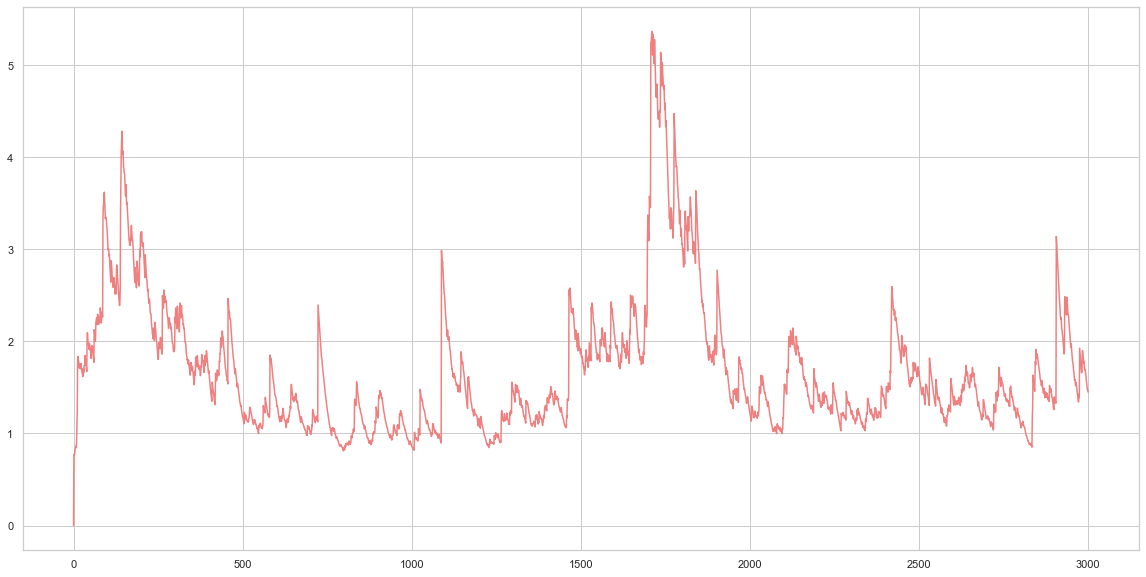

In [43]:
#σ2t+k = w + αu2tk−1 + βσ2t+k−1 

def variance_prediction(params): # 1 omega, 2 alpha and 3 beta
    omega = params[0]
    alpha = params[1]
    beta = params[2]
    ytd_variance = [0]
    
    for i in range(len(tap_train["Log_return"])): 
        tmr_variance = omega + alpha*tap_train["Log_return"][i]**2 + beta* ytd_variance[i]**2
        ytd_variance.append(math.sqrt(tmr_variance))
    plt.plot(ytd_variance, color = 'lightcoral')
    plt.rcParams["figure.figsize"] = (20,10)
    return ytd_variance
var_pre_in = [variance_prediction([xx.params["omega"], xx.params["alpha[1]"], xx.params["beta[1]"]])[-1]]
print("One day ahead variance prediction of in-sample =", var_pre_in)

In [4]:
#σ2t+k = w + αu2tk−1 + βσ2t+k−1 

def variance_predictions(params): # 1 omega, 2 alpha and 3 beta
    omega = params[0]
    alpha = params[1]
    beta = params[2]
    ytd_variance_out = [0]
    
    for i in range(len(tap_test['Log_return'])): 
        tmr_variance_out = omega + alpha*tap_test["Log_return"][i]**2 + beta* ytd_variance_out[i]**2
        ytd_variance_out.append(math.sqrt(tmr_variance_out))
    plt.plot(ytd_variance_out, color = 'green')
    #plt.rcParams["figure.figsize"] = (20,10)
    return ytd_variance_out
var_pre_out = variance_predictions([0.12295175025936815, 0.15254960999135017, 0.8092264465126338])[-1]
print("One day ahead variance prediction of out-of-sample = ", var_pre_out)

KeyError: 0

In [139]:
print(tap_test)

      Log_return
3000    -0.36477
3001     1.63110
3002    -2.44360
3003     0.94291
3004     0.90827
...          ...
4995     0.72788
4996    -0.11301
4997     0.27635
4998    -0.30909
4999    -1.54480

[2000 rows x 1 columns]


Assuming the conditional distributions take the form of normal distributions, write your own log-likelihood function, then use some numerical optimisation algorithm to estimate the parameters. You CANNOT use any existing GARCH toolbox/library and you can use any numerical optimisation algorithm.

In [15]:
#optimisation

def Optimisation(params):
    omega = params[0]
    alpha = params[1]
    beta = params[2]
    ytd_variance = [0.1]
    PDF = []
    for i in range(len(tap_train["Log_return"])-1):
        tmr_variance = omega + alpha*tap_train["Log_return"][i]**2 + beta* ytd_variance[i]**2
        if tmr_variance >0 :
            if alpha + beta < 1 and omega > 0:
                PDF_ = norm.pdf(loc=0,scale=tmr_variance**.5,x=tap_train["Log_return"][i+1])
            
            else:
                return 1000
        else:
            return 1000
        ytd_variance.append(math.sqrt(tmr_variance))
        PDF.append(-np.log(PDF_))
        mean_log_PDF = np.mean(PDF)
    return(mean_log_PDF)

result_norm = minimize(Optimisation, [.04, .09, .6], bounds = ((0,1),(0,1),(0,1)), method = 'nelder-mead')
print(result_norm)

 final_simplex: (array([[0.03228308, 0.0926125 , 0.9073683 ],
       [0.03225881, 0.09260616, 0.90737885],
       [0.03222875, 0.09259736, 0.90739591],
       [0.03225141, 0.09261333, 0.90732214]]), array([1.90376118, 1.90376995, 1.90377967, 1.90378999]))
           fun: 1.9037611778637358
       message: 'Optimization terminated successfully.'
          nfev: 92
           nit: 47
        status: 0
       success: True
             x: array([0.03228308, 0.0926125 , 0.9073683 ])


Now assuming the conditional distributions take the form of Student-t distributions, write your own log-likelihood function, then use some numerical
optimisation algorithm to estimate the parameters. You CANNOT use any existing GARCH toolbox/library and you can use any numerical optimisation algorithm.


In [146]:
def t_optimisation(params):
    omega = params[0]
    alpha = params[1]
    beta = params[2]
    v = params[3]
    ytd_variance = [0.1]
    PDF = []
    for i in range(len(tap_train["Log_return"])-1):
        tmr_variance = omega + alpha*tap_train["Log_return"][i]**2 + beta* ytd_variance[i]**2
        if tmr_variance >0 :
            if alpha + beta < 1 and omega > 0:
                PDF_ = t.pdf(df = v, loc = 0, scale = tmr_variance**.5, x = tap_train["Log_return"][i+1])
            
            else:
                return 1000
        else:
            return 1000
        
        ytd_variance.append(math.sqrt(tmr_variance))
        PDF.append(-np.log(PDF_))
        mean_log_PDF = np.mean(PDF)
    return(mean_log_PDF)

result_t = minimize(t_optimisation, [.07, .1, .6, 3], bounds = ((0,1),(0,1),(0,1),(1,50)), method = 'nelder-mead')
print(result_t)

 final_simplex: (array([[0.01660469, 0.03953657, 0.92268773, 4.43242139],
       [0.01660441, 0.03953589, 0.92268899, 4.43239045],
       [0.01660403, 0.03953627, 0.92268932, 4.43243815],
       [0.01660423, 0.03953556, 0.92268937, 4.43242202],
       [0.01660427, 0.03953564, 0.92268983, 4.43249154]]), array([1.81265521, 1.81265521, 1.81265521, 1.81265521, 1.81265521]))
           fun: 1.8126552064728456
       message: 'Optimization terminated successfully.'
          nfev: 315
           nit: 184
        status: 0
       success: True
             x: array([0.01660469, 0.03953657, 0.92268773, 4.43242139])


In each of parts c) and d), write your own program to simulate a time series of 10000 observations based on your model. Use these observations to compute unconditional mean, variance, and plot an autocorrelation plot for the returns. You CANNOT use any existing GARCH toolbox/library.

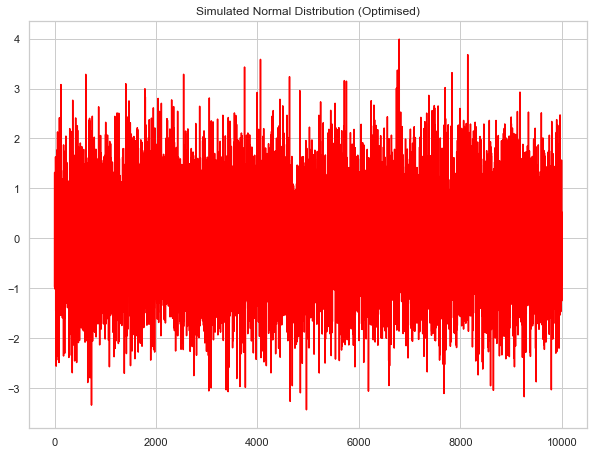

In [92]:
norm_sim = np.random.standard_normal(size = 10000)
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(norm_sim, color = "red")
plt.title("Simulated Normal Distribution (Optimised)")
plt.show()

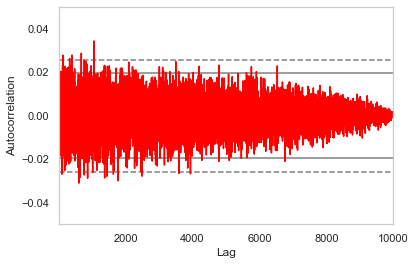

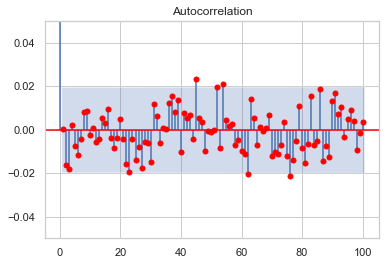

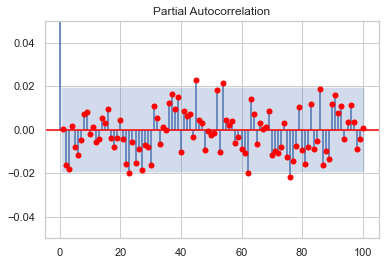

[ 1.00000000e+00  6.54536661e-03 -2.12929175e-02  3.27662384e-03
 -8.89043160e-03 -2.23735386e-02  6.63495851e-03 -6.34756311e-03
 -1.31797317e-03 -1.11696712e-02 -2.16417688e-02 -4.12533688e-03
  1.72953397e-02 -4.20996335e-03  3.95515248e-03 -1.16875233e-02
 -7.52189740e-03 -4.33878528e-03  1.12666420e-02 -1.00366015e-02
  1.02974657e-02 -1.37317995e-02 -6.95677950e-03 -2.16988642e-02
  8.89424687e-04  1.66488970e-02 -5.27965193e-03  8.84845562e-03
 -2.43588437e-04  8.44399767e-03 -1.87665671e-02 -6.62877346e-03
 -1.44117959e-02  7.78601941e-03  4.38447648e-04  7.23200216e-03
  5.48362608e-03 -7.15715725e-04 -4.03355766e-03 -8.38257926e-03
 -6.61145776e-03]


In [108]:
#autocorrelation plot

autocorrelation_plot(norm_sim, color = "red")
plt.ylim(ymin=-0.05,ymax=0.05)
plot_acf(norm_sim**2, lags=100, color = "red")
plt.ylim(ymin=-0.05,ymax=0.05)
plot_pacf(norm_sim**2, lags=100, color = "red")
plt.ylim(ymin=-0.05,ymax=0.05)
plt.show()
print(sm.tsa.acf(norm_sim))

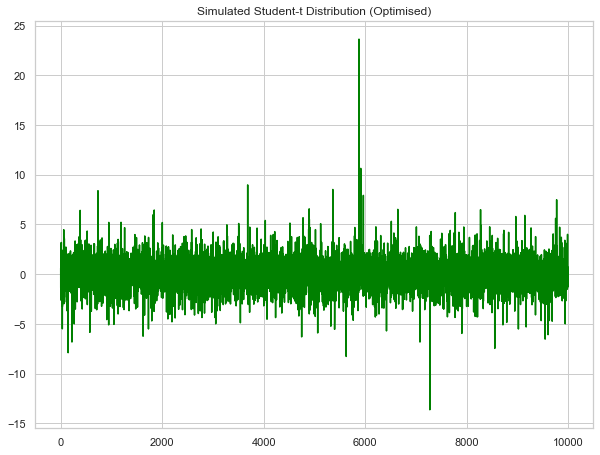

In [104]:
t_sim = np.random.standard_t(df = 4.43242139, size = 10000)
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(t_sim, color = "green")
plt.title("Simulated Student-t Distribution (Optimised)")
plt.show()

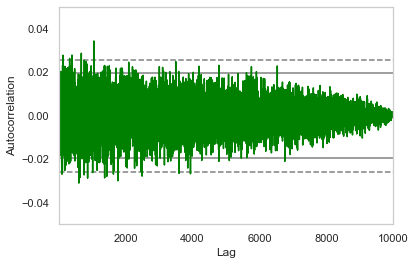

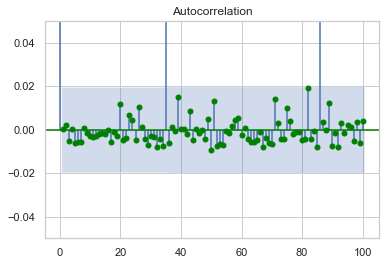

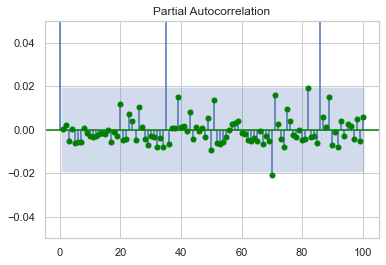

[ 1.00000000e+00  5.98173865e-03 -5.69183340e-03 -2.32964035e-02
  1.39964154e-03 -1.24280720e-02  3.27822615e-03 -8.48085878e-03
 -1.75442275e-02 -3.88407670e-03 -4.48917518e-03 -6.11021497e-04
  6.07591691e-03  1.19568892e-02  1.06783284e-02  2.83007533e-03
 -1.11864592e-02 -1.39536917e-02  1.37970740e-02 -8.25160209e-03
  4.35044394e-03 -1.09342213e-02  3.03234523e-03  1.39367331e-03
  4.46577552e-03  9.43400674e-03  2.58057540e-03  1.76049987e-02
  7.00431853e-03  1.27558559e-02  1.65616136e-03 -4.96641207e-03
  1.10766942e-02 -7.63459131e-03 -1.59549529e-02  1.06463019e-02
  2.38185396e-04  1.41143854e-02 -1.03123436e-03 -4.63743825e-03
 -5.27979631e-03]


In [109]:
#autocorrelation plot

autocorrelation_plot(norm_sim, color = "green")
plt.ylim(ymin=-0.05,ymax=0.05)
plot_acf(t_sim**2, lags=100, color = "green")
plt.ylim(ymin=-0.05,ymax=0.05)
plot_pacf(t_sim**2, lags=100, color = "green")
plt.ylim(ymin=-0.05,ymax=0.05)
plt.show()
print(sm.tsa.acf(t_sim))